## Triển khai dự án
Bước 1: Business Understanding
+ Dựa vào mô tả nói trên => xác định vấn đề: 
+ Tìm ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó 
giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng 
của khách hàng. 
=> Mục tiêu/ vấn đề: Xây dựng hệ thống phân cụm khách 
hàng dựa trên các thông tin do công ty cung cấp từ đó có 
thể giúp công ty xác định các nhóm khách hàng khác nhau 
để có chiến lược kinh doanh, chăm sóc khách hàng phù 
hợp.

Bước 2: Data Understanding/ Acquire
+ Từ mục tiêu/ vấn đề đã xác định: Xem xét các dữ 
liệu cần thiết:
+ Toàn bộ dữ liệu được lưu trữ trong tập tin 
OnlineRetail.csv với 541.909 record chứa tất cả các giao 
dịch xảy ra từ ngày 01/12/2010 đến 09/12/2011 đối với 
bán lẻ trực tuyến.
+ Mô tả dữ liệu: 
https://archive.ics.uci.edu/ml/datasets/online+retail

Bước 4&5: Modeling & Evaluation/ Analyze 
& Report

Bước 6: Deployment & Feedback/ Act

# BÀI LÀM

In [ ]:
#@title Install Pakages
!pip install squarify
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 7.7 MB/s 
     |████████████████████████████████| 4.7 MB 54.9 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 675 kB 47.8 MB/s 
     |████████████████████████████████| 812 kB 40.8 MB/s 
     |████████████████████████████████| 38.1 MB 288 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=30a69c70394df57094eca9721b6c7466be7042c99864394e5c17cb2815dc6b8b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=3f115dcfdddb8f240914e779feebd3e538cfa1a661b762a26bdebc65fb1a56d5
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
#@title Import Pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime, timedelta
import pandas_profiling as pp

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

import scipy.cluster.hierarchy as shc 

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS0_k271_NgoThiNga/Project 2/Data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS0_k271_NgoThiNga/Project 2/Data


In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')  #unicode_escape  

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## EDA

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

+ Tồn tại các giá trị null => Xem xét xử lý

In [ ]:
# chuyển KDL về datetime cho thuộc tính InvoiceDate
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y %H:%M").date()
df.InvoiceDate = df.InvoiceDate.apply(string_to_date)
df.InvoiceDate = df.InvoiceDate.astype('datetime64[ns]')

In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.StockCode.unique().shape

(4070,)

In [ ]:
df.Description.unique().shape

(4224,)

In [ ]:
des_df=df.groupby(['Description','StockCode']).count().reset_index()
des_df.StockCode.value_counts()[des_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,21181,5


+ Từ những điều trên, chúng ta nhận thấy rằng có sự không khớp giữa StockCode và Description và cũng có số Description nhiều hơn StockCode, có nghĩa là có nhiều Description cho một số StockCode.

In [ ]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

+ Tồn tại giá trị âm trong 2 thuộc tính Quantity và UnitPrice, có nghĩa là có thể có một số giao dịch bị hủy trong dữ liệu này.

+ Tính Tổng số tiền giao dịch

In [ ]:
df['Amount']=df.Quantity*df.UnitPrice
df['Amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Amount, dtype: float64

+ Loại bỏ những giao dịch có giá trị âm

In [ ]:
df=df[~(df['Amount']<0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


+ Loại bỏ những giao dịch không có Customer ID (missing value trên Customer ID)

In [ ]:
df=df[~(df.CustomerID.isnull())]
print(df.shape)
df.head()

(397924, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


## RFM

In [ ]:
# # Convert string to date, get max date of dataframe
# max_date = nonnull_customer['InvoiceDate'].max().date()

# Recency = lambda x : (max_date - x.max().date()).days
# Frequency  = lambda x: len(x.unique())
# Monetary = lambda x : round(sum(x), 2)

# df_RFM = df.groupby('CustomerID').agg({'InvoiceDate': Recency,
#                                         'InvoiceNo': Frequency,  
#                                         'Amount': Monetary })

### Tạo Recency

In [ ]:
# Chọn ngày tham chiếu là ngày trước giao dịch cuối cùng
reference_date = df.InvoiceDate.max()
reference_date = reference_date + timedelta(days=1)#timedelta function returns to total number of seconds
print(df.InvoiceDate.max(),df.InvoiceDate.min())
reference_date

2011-12-09 00:00:00 2010-12-01 00:00:00


Timestamp('2011-12-10 00:00:00')

In [ ]:
# tạo biến số ngày trước ngày tham chiếu khi khách hàng mua hàng lần cuối.
df['days_since_last_purchase'] = reference_date - df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head()  

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [ ]:
# Lịch sử giao dịch gần đây nhất của khách hàng
customer_history_df = df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns = {'days_since_last_purchase_num':'Recency'}, inplace=True)
print(customer_history_df.describe())
customer_history_df.head()

         CustomerID      Recency
count   4339.000000  4339.000000
mean   15299.936852    93.041484
std     1721.889758   100.007757
min    12346.000000     1.000000
25%    13812.500000    18.000000
50%    15299.000000    51.000000
75%    16778.500000   142.500000
max    18287.000000   374.000000


,CustomerID,Recency
0,12346.0,326.0
1,12347.0,3.0
2,12348.0,76.0
3,12349.0,19.0
4,12350.0,311.0


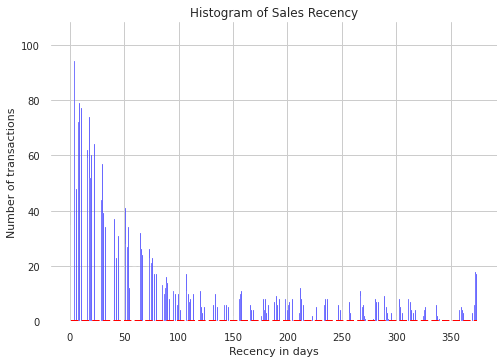

In [ ]:
# Phân phối số lần truy cập gần đây của khách hàng
import math
import scipy
x=customer_history_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75) #alpha=transparency parameter
# Add a best fit line
y=scipy.stats.norm.pdf(bins,mu,sigma) #norm.pdf-probability density function for norm
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

+ Nhận xét: có sự phân bổ chênh lệch doanh số bán hàng gần đây với số lượng giao dịch thường xuyên, cao hơn nhiều và số lượng bán hàng khó xác nhận ít hơn trong các giao dịch gần đây.

### Tạo Monetary

In [ ]:
customer_monetary_val = df[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.Amount = customer_history_df.Amount+0.001
customer_history_df.head()

,CustomerID,Recency,Amount
0,12346.0,326.0,77183.601
1,12347.0,3.0,4310.001
2,12348.0,76.0,1797.241
3,12349.0,19.0,1757.551
4,12350.0,311.0,334.401


### Tạo Frequency

In [ ]:
customer_freq = df[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns = {'Amount':'Frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq,how='outer')

customer_history_df = pd.DataFrame(customer_history_df,columns = ['CustomerID','Recency','Amount','Frequency'])
customer_history_df.head()

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,77183.601,1
1,12347.0,3.0,4310.001,182
2,12348.0,76.0,1797.241,31
3,12349.0,19.0,1757.551,73
4,12350.0,311.0,334.401,17


### Calculate RFM quartiles

In [ ]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [ ]:
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(customer_history_df['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(customer_history_df['Frequency'].rank(method='first'), q=4, labels=f_labels)
 
m_groups = pd.qcut(customer_history_df['Amount'].rank(method='first'), q=4, labels=m_labels)

In [ ]:
# Create new columns R, F, M
df_RFM = customer_history_df.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,CustomerID,Recency,Amount,Frequency,R,F,M
0,12346.0,326.0,77183.601,1,1,1,4
1,12347.0,3.0,4310.001,182,4,4,4
2,12348.0,76.0,1797.241,31,2,2,4
3,12349.0,19.0,1757.551,73,3,3,4
4,12350.0,311.0,334.401,17,1,1,2


### Concat RFM quartile values to create RFM Segments

In [ ]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [ ]:
df_RFM.head()

,CustomerID,Recency,Amount,Frequency,R,F,M,RFM_Segment
0,12346.0,326.0,77183.601,1,1,1,4,114
1,12347.0,3.0,4310.001,182,4,4,4,444
2,12348.0,76.0,1797.241,31,2,2,4,224
3,12349.0,19.0,1757.551,73,3,3,4,334
4,12350.0,311.0,334.401,17,1,1,2,112


#### Count num of unique segments

In [ ]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [ ]:
print(rfm_count_unique.sum())

61


#### Calculate RFM score and level

In [ ]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,CustomerID,Recency,Amount,Frequency,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326.0,77183.601,1,1,1,4,114,6
1,12347.0,3.0,4310.001,182,4,4,4,444,12
2,12348.0,76.0,1797.241,31,2,2,4,224,8
3,12349.0,19.0,1757.551,73,3,3,4,334,10
4,12350.0,311.0,334.401,17,1,1,2,112,4


### Manual Segmentation

In [ ]:
def rfm_level(df):
    if (df['R'] == 4 and df['F'] ==4 and df['M'] == 4)  :
        return 'STARS'
    
    elif (df['R'] == 4 and df['F'] ==1 and df['M'] == 1):
        return 'NEW'
    
    else:     
        if df['M'] == 4:
            return 'BIG SPENDER'
        
        elif df['F'] == 4:
            return 'LOYAL'
        
        elif df['R'] == 4:
            return 'ACTIVE'
        
        elif df['R'] == 1:
            return 'LOST'
        
        elif df['M'] == 1:
            return 'LIGHT'
        
        return 'REGULARS'


In [ ]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [ ]:
df_RFM.head()

,CustomerID,Recency,Amount,Frequency,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,12346.0,326.0,77183.601,1,1,1,4,114,6,BIG SPENDER
1,12347.0,3.0,4310.001,182,4,4,4,444,12,STARS
2,12348.0,76.0,1797.241,31,2,2,4,224,8,BIG SPENDER
3,12349.0,19.0,1757.551,73,3,3,4,334,10,BIG SPENDER
4,12350.0,311.0,334.401,17,1,1,2,112,4,LOST


####Number of segments

In [ ]:
df_RFM['RFM_Level'].value_counts()

REGULARS       1050
LOST           1010
BIG SPENDER     647
LIGHT           462
STARS           438
ACTIVE          372
LOYAL           297
NEW              63
Name: RFM_Level, dtype: int64

#### Calculate mean values for each segment

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Amount': ['mean', 'count']}).round(0)  # thêm các giá trị min, max,...

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
### Tree map

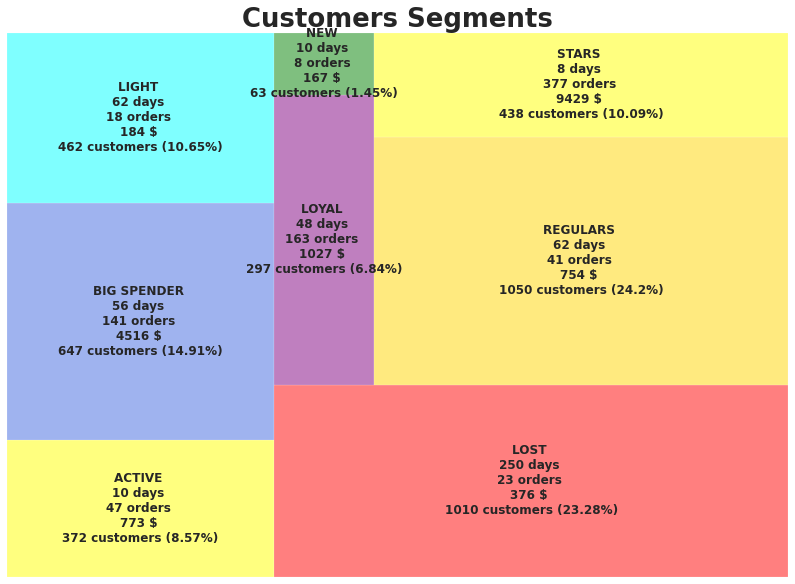

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'POTENTIAL':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Amount',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),
                  
                  selector=dict(mode='markers'))
fig.show()

## Chuẩn hóa dữ liệu

In [ ]:
# RobustScaler
from sklearn import preprocessing
df_RFM['Recency_log'] = df_RFM['Recency'].apply(math.log)
df_RFM['Frequency_log'] = df_RFM['Frequency'].apply(math.log)
df_RFM['Amount_log'] = df_RFM['Amount'].apply(math.log)
feature_vector=['Recency_log','Frequency_log','Amount_log']
X=df_RFM[feature_vector].values
scaler=preprocessing.RobustScaler()
X_scaled=scaler.fit_transform(X)

## Áp dụng model:
+ KMeans
+ Hierachycal
+ GMM

### 1. KMeans Clustering

0.39898016473096376
0.30394211020606104
0.28474620257109134
0.2777340861797857
0.26999136508639243
0.2625997576482144
0.25610655008080196
0.2499165607895976


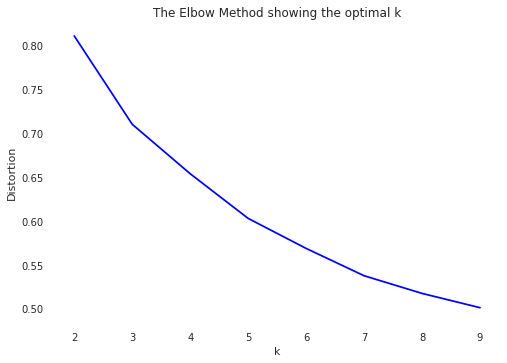

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    print(silhouette_score(X_scaled, kmeanModel.labels_))
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_,'euclidean'), axis=1))/X_scaled.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

+ Chọn k=5

In [ ]:
# Select k=5
k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

centrolds = kmeans.cluster_centers_
labels = kmeans.labels_

print(centrolds)
print(labels)

[[ 0.48352416 -0.25293925 -0.26149734]
 [-0.97477794  0.9666708   1.12211247]
 [ 0.41526952 -1.13250961 -0.89492583]
 [-0.02793165  0.46855954  0.51314016]
 [-0.63761525 -0.11753372 -0.15536353]]
[3 1 3 ... 4 1 3]


In [ ]:
predict_kmean = pd.Series(labels)
predict_kmean.head()

0    3
1    1
2    3
3    3
4    0
dtype: int32

In [ ]:
df_RFM_sc  aler= pd.DataFrame(data =X_scaled, columns=['Recency_scaler','Frequency_scaler','Monetary_scaler'])

In [ ]:
df_RFM_scaler["Cluster"] = kmeans.labels_
df_RFM_scaler.groupby('Cluster').agg({
    'Recency_scaler':'mean',
    'Frequency_scaler':'mean',
    'Monetary_scaler':['mean', 'count']}).round(2)

Recency_scaler Frequency_scaler Monetary_scaler      
                  mean             mean            mean count
Cluster                                                      
0                 0.48            -0.25           -0.26  1191
1                -0.97             0.96            1.12   648
2                 0.42            -1.13           -0.89   704
3                -0.02             0.47            0.51  1030
4                -0.64            -0.12           -0.16   766

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_RFM_scaler.groupby('Cluster').agg({
    'Recency_scaler': 'mean',
    'Frequency_scaler': 'mean',
    'Monetary_scaler': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2


,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,0.0,-0.0,-0.0,1191,27.45
1,Cluster 1,-1.0,1.0,1.0,648,14.93
2,Cluster 2,0.0,-1.0,-1.0,704,16.22
3,Cluster 3,-0.0,0.0,1.0,1030,23.74
4,Cluster 4,-1.0,-0.0,-0.0,766,17.65


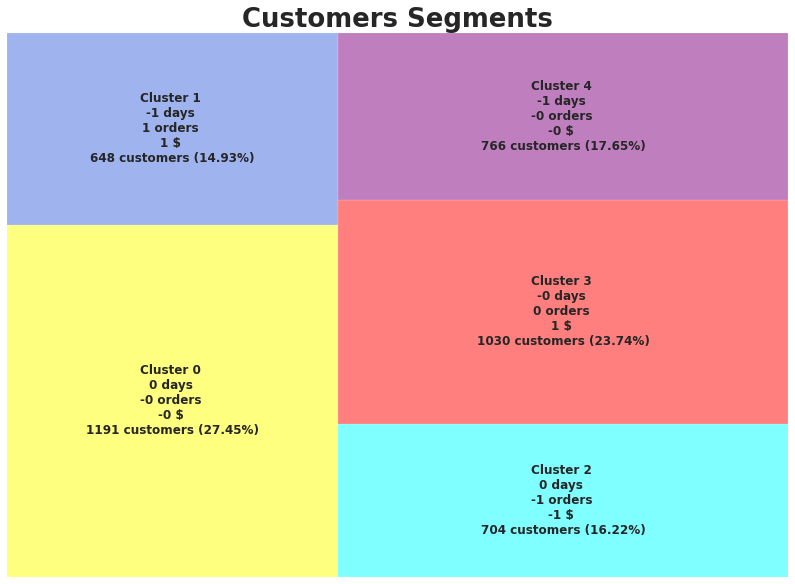

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

+ Với K=5 nhóm dược chọn trong Keans model cho kết quả phân loại thành các nhóm rõ ràng.

### Hierachycal Clustering

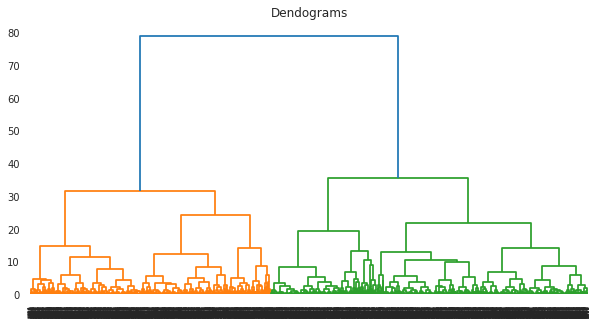

In [ ]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10, 5))
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward')) 

In [ ]:
# cluster = 4
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
cluster.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [ ]:
print(cluster.labels_)  

[1 0 1 ... 2 0 0]


In [ ]:
predict_hier = cluster.fit_predict(X_scaled)
predict_hier

array([1, 0, 1, ..., 2, 0, 0])

In [ ]:
df_RFM_scaler["Cluster"] = cluster.labels_
df_RFM_scaler.groupby('Cluster').agg({
    'Recency_scaler':'mean',
    'Frequency_scaler':'mean',
    'Monetary_scaler':['mean', 'count']}).round(2)

Recency_scaler Frequency_scaler Monetary_scaler      
                  mean             mean            mean count
Cluster                                                      
0                -0.56             0.87            0.99  1011
1                 0.23            -0.22           -0.16  1638
2                 0.51            -1.00           -0.84   827
3                -0.59             0.26            0.16   863

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_RFM_scaler.groupby('Cluster').agg({
    'Recency_scaler': 'mean',
    'Frequency_scaler': 'mean',
    'Monetary_scaler': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,-1.0,1.0,1.0,1011,23.30
1,Cluster 1,0.0,-0.0,-0.0,1638,37.75
2,Cluster 2,1.0,-1.0,-1.0,827,19.06
3,Cluster 3,-1.0,0.0,0.0,863,19.89


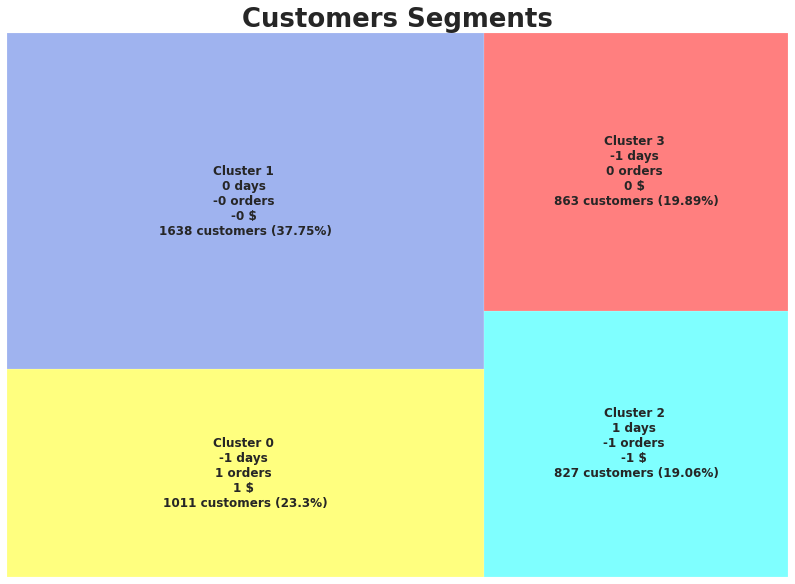

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

### GMM

In [ ]:
list_sil = []
K = range(4,7)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    sil = silhouette_score(X_scaled, labels, metric='euclidean')
    list_sil.append(sil)
    
list_sil

[0.07316193523531402, 0.10029190191907039, 0.06170224338696088]

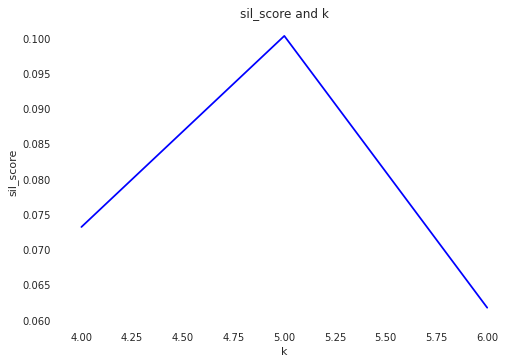

In [ ]:
# Plot the elbow
plt.plot(K,list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('sil_score and k')
plt.show()

In [ ]:
# Chọn n_componens = 5 
gmm = GaussianMixture(n_components=5)
gmm.fit(X_scaled)

GaussianMixture(n_components=5)

In [ ]:
print(gmm.weights_)

[0.15557249 0.31557359 0.15706619 0.1397794  0.23200833]


In [ ]:
types = gmm.predict(X_scaled)
types

array([3, 2, 3, ..., 4, 2, 1])

## Kết Luận: